# Практическая работа 5. Кластеризация DBSCAN

**Задача: "Выявление групп пользователей в социальной сети с использованием метода
DBSCAN"**

Описание задачи: Решить задачу кластеризации пользователей социальной сети с
использованием метода DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

Цель - выявить группы пользователей с похожим поведением или интересами.

In [42]:
!kaggle datasets download -d arindamsahoo/social-media-users
!unzip social-media-users.zip

Dataset URL: https://www.kaggle.com/datasets/arindamsahoo/social-media-users
License(s): DbCL-1.0
social-media-users.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  social-media-users.zip
replace SocialMediaUsersDataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [43]:
import pandas as pd

social_media_users = pd.read_csv("SocialMediaUsersDataset.csv")
social_media_users.head(3)

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan


In [44]:
social_media_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     100000 non-null  int64 
 1   Name       100000 non-null  object
 2   Gender     100000 non-null  object
 3   DOB        100000 non-null  object
 4   Interests  100000 non-null  object
 5   City       100000 non-null  object
 6   Country    100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
X = social_media_users["Interests"].values
X[0]

"'Movies', 'Fashion', 'Fashion', 'Books'"

In [46]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

X_split = [item.replace("'", "").split(', ') for item in X]

mlb = MultiLabelBinarizer()

X_mlb = mlb.fit_transform(X_split)

print(X_mlb[0])

[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
indexes = (X_mlb[:, 0] > 0)
for i,j in enumerate(indexes[:100]):
  if j == True:
    print(X[i])

'Gaming', 'Travel', 'Technology', 'Art'
'Art', 'Cooking', 'Cars and automobiles', 'Fashion', 'History'
'Cooking', 'Art', 'Gardening', 'Social causes and activism'
'Art', 'Photography'
'Education and learning', 'Fitness', 'Outdoor activities', 'Gardening', 'Art'
'Cars and automobiles', 'Food and dining', 'Education and learning', 'Art', 'Finance and investments'
'Art', 'Science', 'Business and entrepreneurship', 'Photography'
'Art', 'Beauty', 'Fashion', 'Fitness', 'Finance and investments'
'Finance and investments', 'Art'
'Art', 'Health and wellness'


**Везде есть 'Art'**

Кластеризация своими руками

In [48]:
import numpy as np

clusters_x = np.exp(np.arange(1, len(X_mlb[0])+1))
clusters_y = np.arange(1, len(X_mlb[0])+1) ** 10
res_x = [0] * len(X_mlb)
res_y = [0] * len(X_mlb)
res_c = [0] * len(X_mlb)

for i in range(len(res_x)):
  res_x[i] = np.dot(X_mlb[i], clusters_x)
  res_y[i] = np.dot(X_mlb[i], clusters_y)
  res_c[i] = res_x[i] + res_y[i]

res_x[0]

24163075.923039798

In [49]:
for i,j in enumerate(res_x):
  if j == 24163075.923039798:
    print(X[i], X_mlb[i])

'Movies', 'Fashion', 'Fashion', 'Books' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Fashion', 'Movies', 'Books' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Fashion', 'Movies', 'Fashion', 'Books' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Movies', 'Books', 'Fashion' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Movies', 'Books', 'Fashion' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Fashion', 'Books', 'Movies' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Books', 'Fashion', 'Movies' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Books', 'Movies', 'Fashion' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Books', 'Movies', 'Fashion' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Movies', 'Books', 'Books', 'Fashion', 'Fashion' [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
'Movies', 'Books', 'Fashion', 'Fashion' [0 0 1 0 0 0 0 0 1 0 0 0 0 0

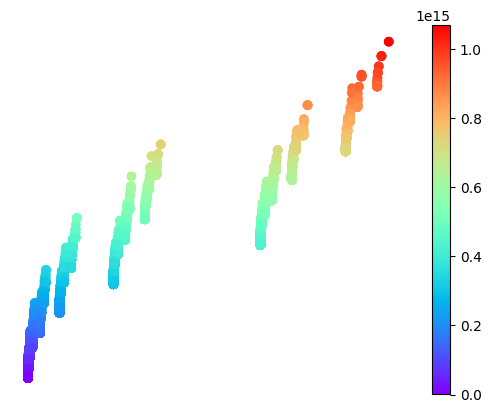

In [50]:
import matplotlib.pyplot as plt

plt.scatter(res_x, res_y, c=res_c, cmap="rainbow")
plt.colorbar()
plt.axis("off")
plt.show()

In [51]:
!pip install hdbscan
import hdbscan

In [52]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, MeanShift, AffinityPropagation, SpectralClustering, MiniBatchKMeans

In [53]:
data = np.array(list(zip(res_x, res_y)))

kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(data)

labels_kmeans = kmeans.predict(data)

In [54]:
print(len(X_mlb[0]))

29


In [55]:
labels_kmeans

array([115, 899, 484, ...,  51, 357, 368], dtype=int32)

Получили 1000 класстеров. Алгоритм не имеет большого смысла, так как нам не удалось избавиться от приоритетности, то есть в нашем примере у нас History близок к 0, хотя это не оценочный показатель. При высоких степенях алгоритм работает довольно хорошо, так как уменьшает связи, возможно необходимо было бы использовать функцию активации, чтобы она масштабировала признаки и, возможно, оставить на оси X.

Я бы использовал свою кластеризацию из проекта, которая методом k-ближайших использовала ближайших, и классифицировала их в отдельные классы

In [56]:
for i in range(len(labels_kmeans)):
    if labels_kmeans[i] == 0:
        print(X[i])

'Art', 'Cooking', 'Cars and automobiles', 'Fashion', 'History'
'History'
'Fashion', 'History'
'History'
'History'
'Cars and automobiles', 'Cooking', 'History'
'History'
'Books', 'History'
'Books', 'History'
'History'
'History', 'Fashion', 'Art'
'History'
'History'
'History'
'History'
'Books', 'History'
'History'
'History', 'Fitness'
'History', 'Cooking', 'Beauty'
'Beauty', 'Cooking', 'Art', 'Fitness', 'History'
'History'
'History'
'History', 'Food and dining', 'Education and learning', 'DIY and crafts', 'Art'
'Cooking', 'History', 'Cars and automobiles'
'Fashion', 'History'
'History'
'History', 'Beauty'
'History', 'History', 'Business and entrepreneurship', 'Fashion'
'Business and entrepreneurship', 'Finance and investments', 'DIY and crafts', 'History'
'DIY and crafts', 'Finance and investments', 'History', 'Business and entrepreneurship'
'Health and wellness', 'Gaming', 'Gardening', 'Beauty'
'History', 'Cars and automobiles'
'History', 'History', 'History'
'Fashion', 'History', 'Cars

In [57]:
from sklearn.metrics import silhouette_score

silhouette_score(data, labels_kmeans)

0.8216287563952985

Значение silhouette_score варьируется от -1 до 1, где значения, близкие к 1, указывают на хорошо разделенные и плотные кластеры, а значения, близкие к -1, указывают на плохо разделенные кластеры.

In [58]:
# from sklearn.model_selection import GridSearchCV

# batch_kmeans = MiniBatchKMeans(n_clusters=1000, random_state=42)

# batch_kmeans.fit(data)

# labels_batch = batch_kmeans.predict(data)

# silhouette_score(data, labels_batch)

In [59]:
# dbscan = DBSCAN(eps=0.5, min_samples=5)

# labels_dbscan = dbscan.fit_predict(data)

# silhouette_score(data, labels_dbscan)

In [60]:
# agglomerative = AgglomerativeClustering(n_clusters=100)

# labels_agglomerative_cl = agglomerative.fit_predict(data)

# silhouette_score(data, labels_agglomerative_cl)
# превышает ОЗУ

In [61]:
# birch = Birch(n_clusters=1000)

# labels_birch = birch.fit_predict(data)

# silhouette_score(data, labels_birch)
# превышает ОЗУ

In [62]:
# mean_sh = MeanShift(bandwidth=0.5)

# labels_mean_sh = mean_sh.fit_predict(data)

# silhouette_score(data, labels_mean_sh)

In [63]:
# aff_prop = AffinityPropagation(damping=0.5, preference=-50, random_state=42)

# labels_aff_prop = aff_prop.fit_predict(data)

# silhouette_score(data, labels_aff_prop)
# превышает ОЗУ

In [64]:
# spec_clust = SpectralClustering(n_clusters=10, random_state=42)

# labels_spec_clust = spec_clust.fit_predict(data)

# silhouette_score(data, labels_spec_clust)
# превышает ОЗУ

In [65]:
import hdbscan

hdbscan = hdbscan.HDBSCAN(min_cluster_size=10)

labels_hdbscan = hdbscan.fit_predict(data)

silhouette_score(data, labels_hdbscan)

0.5486945469713513

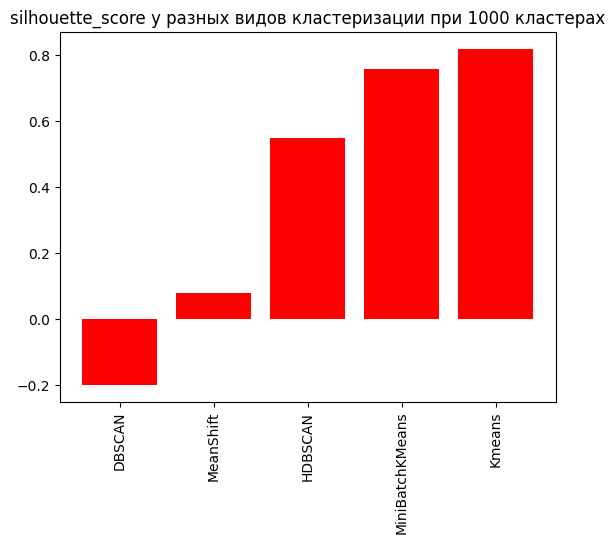

In [66]:
x = ['DBSCAN', 'MeanShift', 'HDBSCAN' ,'MiniBatchKMeans','Kmeans']
y = [-0.2, 0.08, 0.55, 0.76, 0.82]

plt.bar(x, y, color="red")
plt.xticks(rotation=90)
plt.title('silhouette_score у разных видов кластеризации при 1000 кластерах')
plt.show()

Kmeans 0.82

MiniBatchKMeans 0.76

HDBSCAN 0.55

MeanShift 0.08

DBSCAN -0.20
